In [1]:
! pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /Applications/MAMP/Library/lib/python2.7/site-packages (0.9.0)


# Analyse KickStarter

In [142]:
# Library imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(13,9)})

In [143]:
predf = pd.read_csv('dataset.csv', index_col=0)
reset = predf.reset_index()
df = reset.drop(columns=['ID'])

df.head()


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.00,12.00,56.00,2.193820e+05
usd pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


In [145]:
df.count()

name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

## traitement des données dupliquées ou manquantes

In [146]:
duplicated_values = df.duplicated().sum()
print(f'Le dataset comporte {duplicated_values} valeurs dupliquées.')

Le dataset comporte 0 valeurs dupliquées.


les features ont des données manquantes ['usd pledged', 'name']


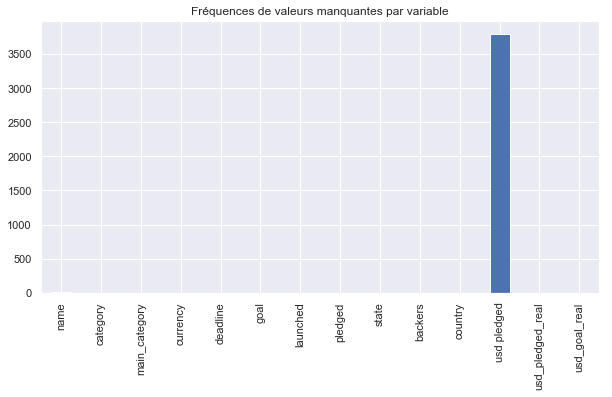

In [150]:

null_c = df.isnull().sum(axis=0).sort_values(ascending=False)*100/df.shape[0]
print("les features ont des données manquantes {}".format(list(null_c[null_c !=0].index)))

df.isna().sum().plot.bar(
    title='Fréquences de valeurs manquantes par variable',
    figsize=(10,5))

In [151]:
clean_df = df.dropna(subset=['name'])

n'ayant que 4  projet avec le nom manquant par securité nous les enlevons du dataset

In [152]:
null_c = clean_df.isnull().sum(axis=0).sort_values(ascending=False)*100/clean_df.shape[0]
print("les features ont des données manquantes {}".format(list(null_c[null_c !=0].index)))


les features ont des données manquantes ['usd pledged']


In [287]:
df = clean_df.copy()

df['usd pledged'] = df['usd pledged'].fillna(df['usd_pledged_real'])
# création d'une variable de succes
df['succes'] = ['succes' if i == 'successful' else 'echec' for i in df['state']]
plt.figure(figsize=(17,5))
df.head(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,succes
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,echec
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,echec
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,echec
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,echec
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,echec


<Figure size 1224x360 with 0 Axes>

en sachant grace à la heatmap plus ba la corellation entre usd pledged et usd_pledged_real de 94% nous nous permettons de remplacer les valeurs manquantes de usd pledeged par celles de usd_pledeged_real

### recherche Univarié des projets reussis ratés ou autres

Ici nous allons examiner le pourcentage de projet reussis, ratés et annulés

% de abandon  :  10.24119453753661
% de raté  :  52.21506534937952
% d'en direct  :  0.7391914054143989
% de succes  :  35.37660732536306
% d'en direct  :  0.4872483540512918
% de non defini  :  0.9406930282551227


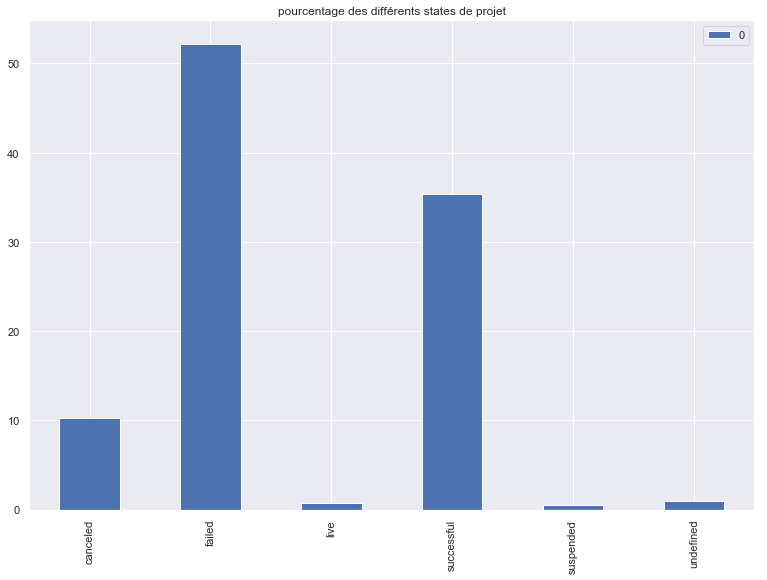

In [155]:


tot = df['state'].count()

successful = df['state'] == 'successful'
failed = df['state'] == 'failed'
canceled = df['state'] == 'canceled'
live = df['state'] == 'live'
suspended = df['state'] == 'suspended'
undefined = df['state'] == 'undefined'

suc=0
for x in successful:
    if x == True:
        suc += 1
f=0
for x in failed:
    if x == True:
        f += 1
c=0
for x in canceled:
    if x == True:
        c += 1
l=0
for x in live:
    if x == True:
        l += 1
 
sus=0
for x in suspended:
    if x == True:
        sus += 1
        
u=0
for x in undefined:
    if x == True:
        u += 1

m1 = c/tot*100 
m2 = f/tot*100
m3 = l/tot*100
m4 = suc/tot*100
m5 = sus/tot*100
m6 = u/tot*100
print("% de abandon  : ", m1)
print("% de raté  : ", m2)
print("% d'en direct  : ", m3)
print("% de succes  : ", m4)
print("% d'en direct  : ", m5)
print("% de non defini  : ", m6)
yes = pd.DataFrame(data=[m1, m2, m3,m4,m5,m6], index=["canceled", "failed", "live","successful","suspended","undefined"])

yes.plot.bar(title='pourcentage des différents states de projet')

On remarque que plus de la moitié des projet n'aboutissent pas et que seulement 35% des projets reussissent.

Nous allons donc chercher mettre en avant les facteurs qui mennent ou pas à des  projets reussis ou pas 

### analyse des projets par pays univarié puis bivarié


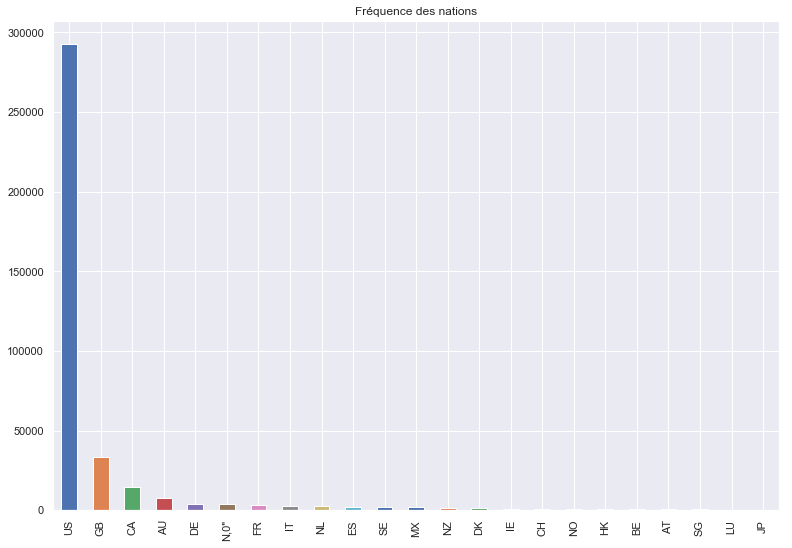

In [291]:
df['country'].value_counts().plot.bar(title='Fréquence des nations')

ici nous voyons que la majorité des projets viennent des USA

nous allons maintenant voir leur taux de succes

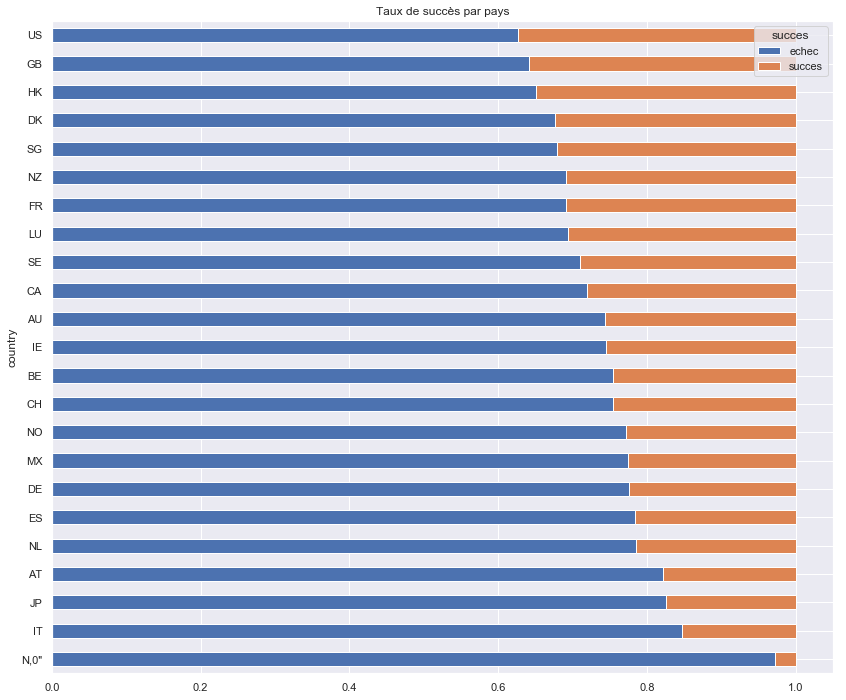

In [293]:
country_ = df.groupby('country')
country_ = country_['succes'].value_counts(normalize=True).unstack()
country_ = country_.sort_values(by=['succes'],ascending=True)
country_.plot(kind='barh', stacked=True,figsize=(14,12),title="Taux de succès par pays")


On peut remarqué que le nombre de projet par pays correlle globalement avec le succes de celui ci cependant on peut remarqué que les projets canadiens troisieme plus nombreux sont les 10eme en terme de reussite

### analyse des categories 

In [78]:
cat = df.main_category.unique()
print(cat)
len(cat)

['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']


15

15 grandes catégorie que nous allons pouvoir etudier

In [77]:
sub_cat = df.category.unique()
print(sub_cat)
len(sub_cat)

['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games'
 'Flight' 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'
 'Thrillers' "Children's Books" 'Audio' 'Performance Art' 'Ceramics'
 'Vegan' 'Graphic Novels' 'Fabrication Tools' 'Performances' 'Sculpture'
 'Sound' 'Stationery' '

159

les petite catégories etant tres nombreuses nous allons nous passer de cette étude pour le moment

quels sont les catégories regroupant le plus de projets ?


main_category
Art             28152
Comics          10819
Crafts           8809
Dance            3768
Design          30069
Fashion         22816
Film & Video    63584
Food            24602
Games           35230
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
Name: name, dtype: int64


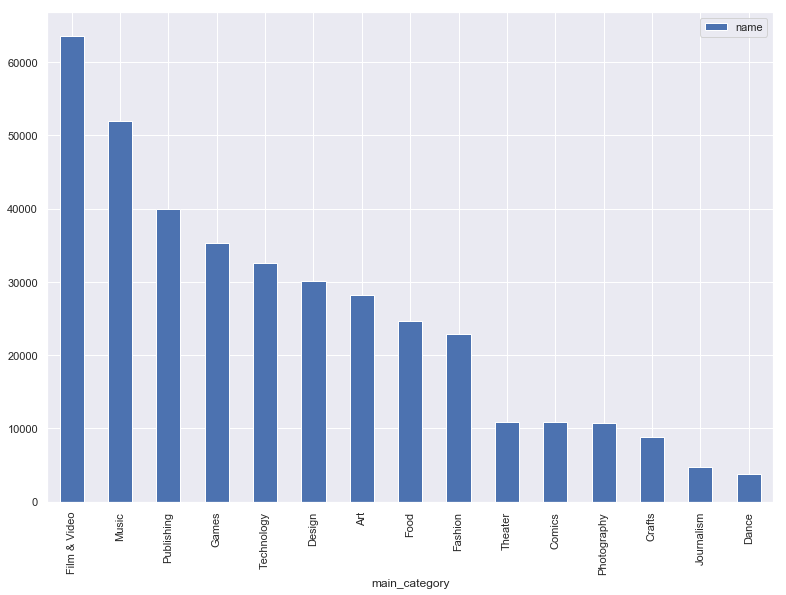

In [183]:

count_cat = df.groupby('main_category')['name'].count() 
print(count_cat)
#repartition des main_categories
repar_cat = pd.DataFrame(data=count_cat).sort_values(by='name', ascending=False)

repar_cat.plot.bar()

Nous pouvons ainsi observé quelles sont les catégories les plus utilisées
maintenant cherchons à savoir lequelles rencontre plus ou moins de succes


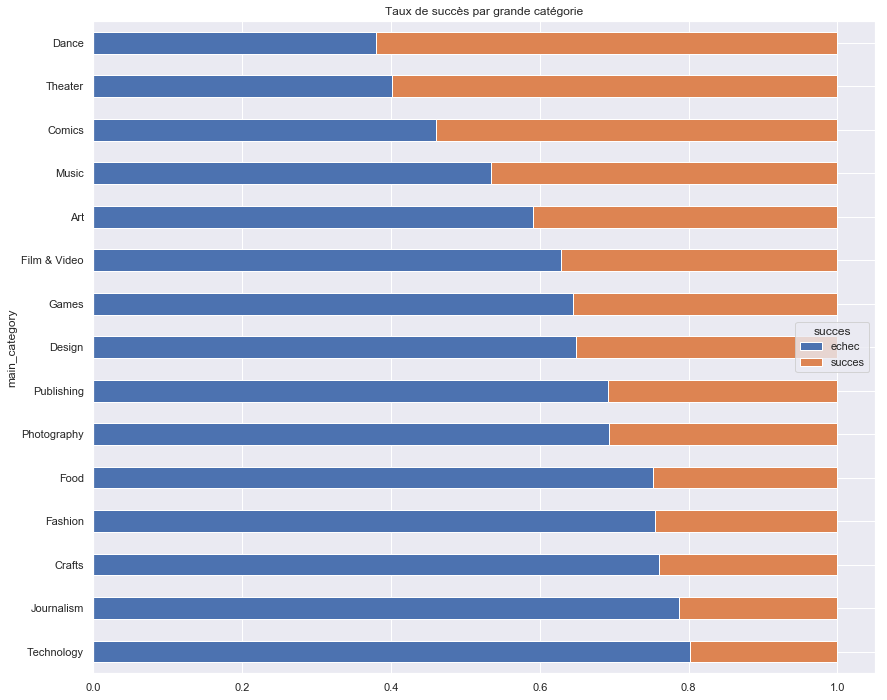

In [173]:

category_ = df.groupby('main_category')
category_ = category_['succes'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['succes'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(14,12),title="Taux de succès par grande catégorie")


Il n'y a que 3 catégories qui ont un ratio de succes superieur à 50% ce sont des petites catégories : Dance, Theater et comics

### analyse bivariée entre le taux de succes ou d'echec et le montant engagé

In [231]:
corr_pledged = df['usd_pledged_real'].corr(df['usd pledged'])
print(corr_pledged*100)


90.7978089357388


avec un coefficient de correlation de 90% entre usd pledged et usd_pledged_real on peut se permettre de passer outre usdpledged

nous allons donc determiner le taux de succes par rapport au montant engagé

/Users/alexandrelegars/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


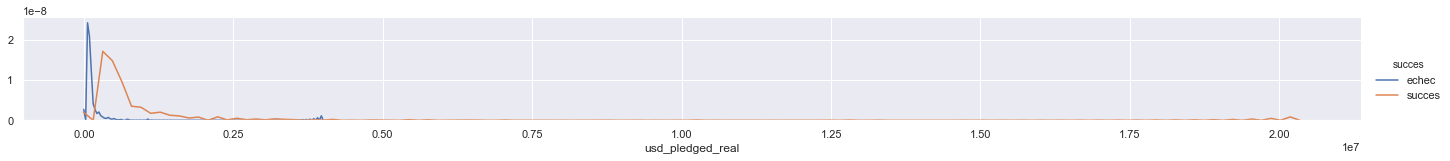

In [295]:

g = sns.FacetGrid(df, hue='succes',height=2.4, aspect=8)
g.map(sns.kdeplot,'usd_pledged_real')
g.add_legend()

In [ ]:
On remarque que plus le montant engagé est faible plus le taux d echec est fort 

### analyse bivariée entre le montant voulu  et le succes du projet

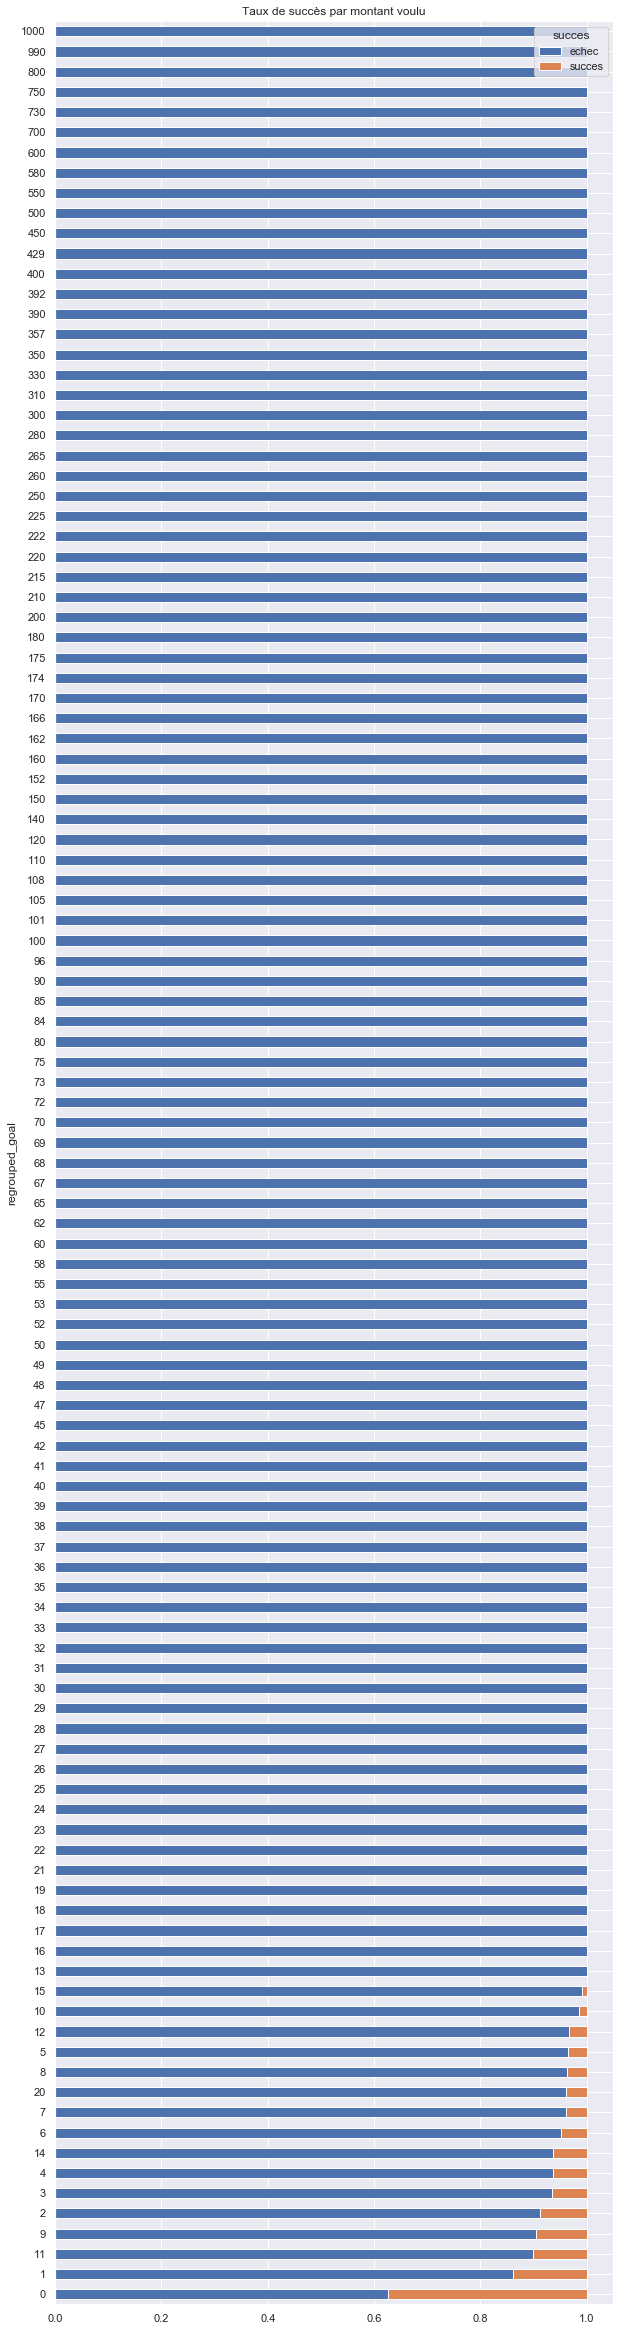

In [252]:
new_df = df.copy()
new_df['regrouped_goal'] = new_df['goal'].apply(lambda x: round(x/100000))
# regroupement des valeurs par paquet pour libéré de l'espace de calcul
goal = new_df.groupby('regrouped_goal')
goal = goal['succes'].value_counts(normalize=True).unstack()
goal = goal.sort_values(by=['succes'], ascending=False)
goal.plot(kind='barh', stacked=True,figsize=(10,42),title="Taux de succès par montant voulu")


On remarque que moins le montant demandé est important plus le projet a de chance d'aboutir

grace à notre heat map plus bas le coeficient de corrélation entre goal et usd_goal_real de 0.94 donc nous pouvons en deduire que la colonnes usd_goal_real est inutile .

### analyse bivariée entre le nombre de contributeurs  et le succes du projet

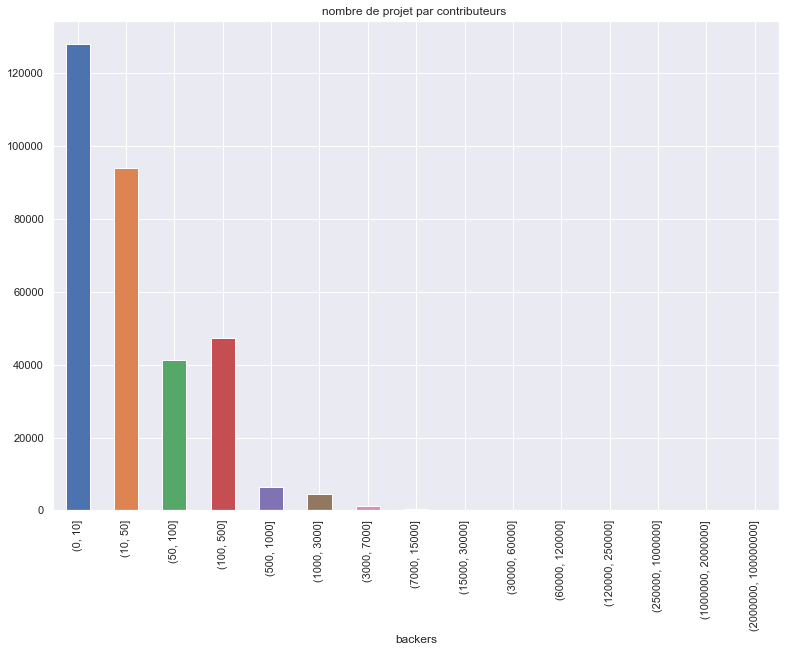

In [306]:
#tout d'abord nous devons regroupé les contributeurs par intervalles histoire d'avoir un nombre limités de lignes dans le tableau 
# grace à la fonction cut de pandas il est possible de borner un tableau

tab = [0,10,50,100,500,1000,3000,7000,15000,30000,60000,120000,250000,1000000,2000000,100000000]

new_df2 = df.copy()
bins = pd.cut(new_df2['backers'],tab)
#on a bien regroupé les projet par nombre de contributeur maintenant regroupons les sur les projet à succes
sucess_col = new_df2[new_df2['succes'] == 'succes']
succes = pd.cut(sucess_col['backers'], tab)

data = new_df2.groupby(bins)['backers'].count().plot.bar(title='nombre de projet par contributeurs ')




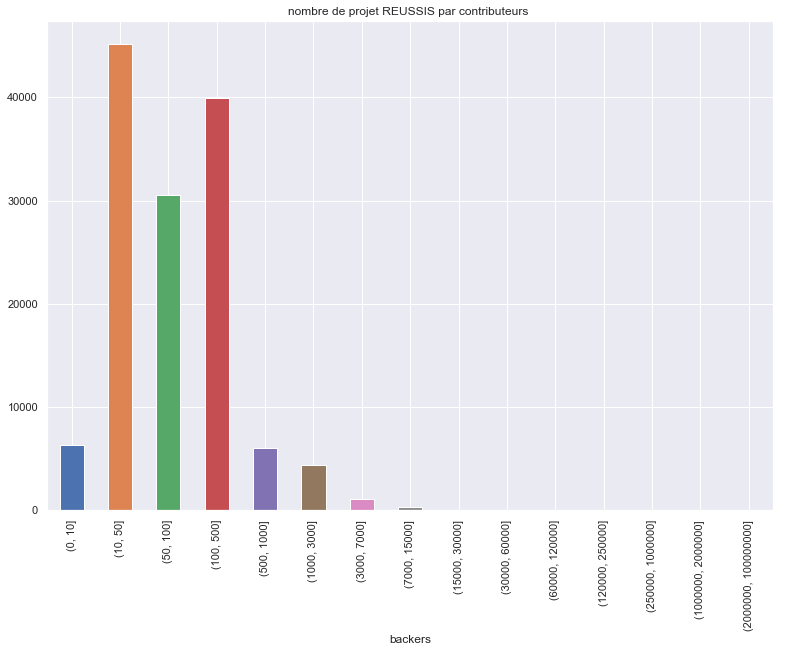

In [301]:
sucess_col.groupby(succes)['backers'].count().plot.bar(title="nombre de projet REUSSIS par contributeurs ") 

Nous obtenons une analyse univarié du nombre de projet  par intervalle de contributeurs
Nous obtenons une analyse bivariés du nombre de projet REUSSI  par intervalle de contributeurs
en comparant ces deux tableauxNous remarquons que plus le nombre de contributeur augmente plus le nombre de projet reussi et engagé est semblable
On peut en deduire que plus le nombre de contributeur augmente plus le projet a de chances d'aboutir




## analyse des temps d'ouverture du compte et de leur succes 
     
     

## les outliers

les outliers sont negligeable ici car toutes les valeurs extravagantes peuvent etre prises en compte vu le nombre d'entrées 

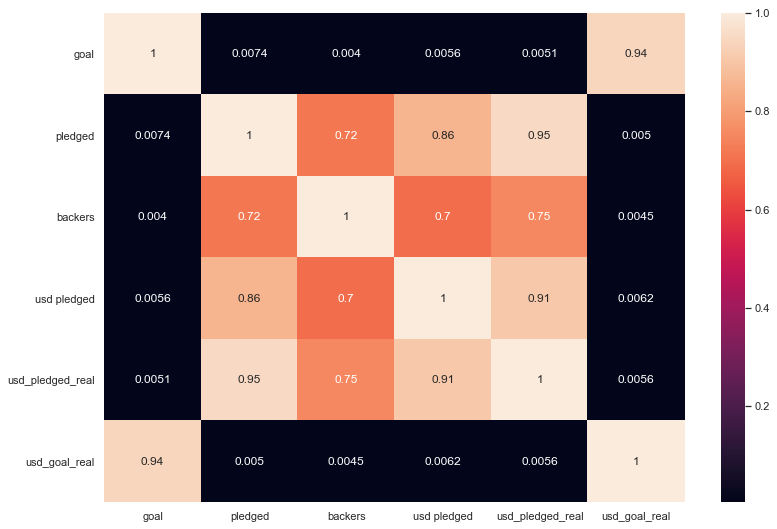

In [288]:
sns.heatmap(df.corr(), annot=True)

On remarque la correlation entre Goal et goal_real ainsi que tout les montant pledged entre eux 
ce qui nous indique que nous n'avons pas à exploiter betement toute les colonnes de montant 

Il y a une données interessante et logique c'est un coefficient de corrélation important entre le nombre de contriibuteurs et les montants engagés ce qui est logique.

Cependant on remarque que les montant engagé et le but atteint ne sont pas du tout correlés ce qui confirme notre analyse qui montrait que plus de la moitier des projets ne sont pas concluants

# conclusion

On peut observer une grosse correlation entre le nombre de contributeur et la reussite du projet.

On remarque aussi qu'a partir d'un certain montant engagé le projet à plus de chance d'aboutir (comme une étape à passer)

on observe que KickStarter est tres Americains et les Americains sont les plus à meme de reussir leur projet

